<a href="https://colab.research.google.com/github/gorzanskik-ai/statistics/blob/main/02_probits/02_mean_trimmed_weighted.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/statistics/data/yellow_tripdata_2021-05.parquet"

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
taxi = pd.read_parquet(path, engine='auto', columns=['trip_distance'], storage_options=None, use_nullable_dtypes=False)
taxi.query('trip_distance > 0 and trip_distance < 10', inplace=True)

Trimmed mean

In [4]:
from scipy import stats

taxi_trim_mean = stats.trim_mean(taxi['trip_distance'], 0.1) #5% najmniejszych i 5% największych

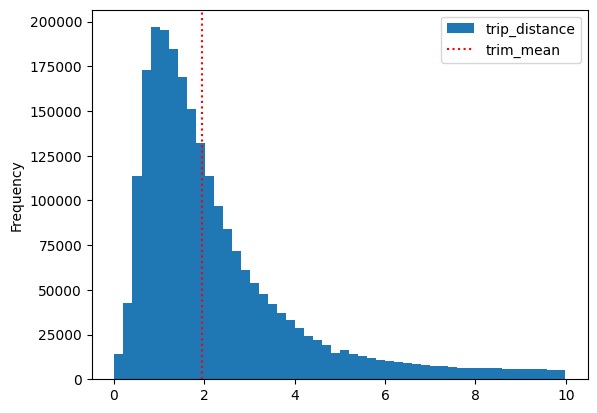

In [5]:
taxi.plot.hist(column='trip_distance', bins=50)
plt.axvline(taxi_trim_mean, color='red', linestyle='dotted', label='trim_mean')
plt.legend(['trip_distance', 'trim_mean'])
plt.show()

In [9]:
taxi = pd.read_parquet(path, engine='auto', columns=None, storage_options=None, use_nullable_dtypes=False)

trim_means = []
for i in range(1, 101):
    probe = taxi.sample(frac=i/100)
    trim_mean = stats.trim_mean(probe['trip_distance'], 0.1)
    trim_means.append(trim_mean)

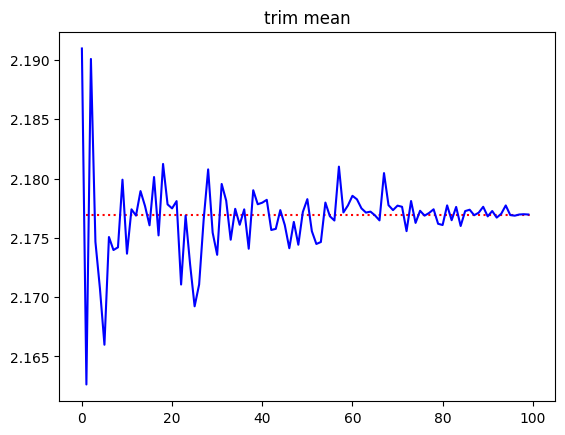

In [11]:
plt.hlines(xmin=1, xmax=100, y=stats.trim_mean(taxi['trip_distance'], 0.1), linestyles='solid', colors='red', linestyle='dotted')
plt.plot(trim_means, color='blue')
plt.title('trim mean')
plt.show()

Weighted mean

In [15]:
taxi = pd.read_parquet(path, engine='auto', columns=['tpep_pickup_datetime','trip_distance','passenger_count'],
        storage_options=None, use_nullable_dtypes=False)
taxi.query("trip_distance > 0 and passenger_count>0 and \
            tpep_pickup_datetime>='2021-05-09' and tpep_pickup_datetime<'2021-05-10'", inplace=True)

In [16]:
taxi.head()

,tpep_pickup_datetime,trip_distance,passenger_count
565585,2021-05-09 08:02:47,9.25,1.0
570958,2021-05-09 09:22:48,9.62,1.0
576082,2021-05-09 09:41:01,1.49,1.0
576083,2021-05-09 10:27:38,14.44,1.0
586667,2021-05-09 12:00:52,10.58,1.0


In [17]:
taxi_mean = taxi['passenger_count'].mean()
taxi_weigh_mean = sum(taxi['trip_distance'] * taxi['passenger_count']) / taxi['trip_distance'].sum() #waga -> passenger count

In [20]:
means = []
weighted_means = []
for i in range(1, 101):
    probe = taxi.sample(frac=i/100)
    mean = probe['passenger_count'].mean()
    weighted_mean =  sum(probe['trip_distance'] * probe['passenger_count']) / probe['trip_distance'].sum()

    means.append(mean)
    weighted_means.append(weighted_mean)

[]

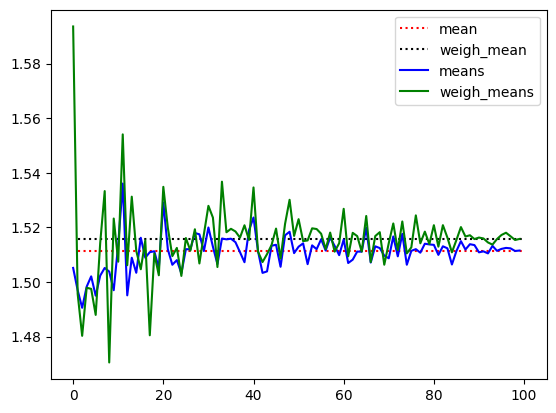

In [22]:
plt.hlines(xmin=1, xmax=100, y=taxi_mean, linestyles='solid', colors='red', linestyle='dotted', label='mean')
plt.hlines(xmin=1, xmax=100, y=taxi_weigh_mean, linestyles='solid', colors='black', linestyle='dotted', label='weigh_mean')
plt.plot(means, color='blue', label='means')
plt.plot(weighted_means, color='green', label='weigh_means')
plt.legend(['mean', 'weigh_mean', 'means', 'weigh_means'])
plt.plot()